## Load Data

In [112]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from math import log, exp
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import linear_model

In [113]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [114]:
# Save the 'Id' column
#train_ID = train_df['Id']
test_ID = test_df['Id']
# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [124]:
y_train = pd.read_csv('y_train1st.csv')
x_train = pd.read_csv('X_train1st.csv')
x_test = pd.read_csv('X_test1st.csv')
test_MiscVal = pd.read_csv('test_MiscVal.csv')


In [116]:
#delete the loaded csv files
del train_df, test_df

In [117]:
#This function ta
def model_to_csv(model, x_test, test_ID, csv_name):
    y = model.predict(x_test)
    y = pd.Series([round(exp(x)) for x in y],name='SalePrice')
    y_out = pd.concat([test_ID, y], axis=1)
    y_out["SalePrice"] = y_out["SalePrice"]+ test_MiscVal["MiscVal"]
    y_out.to_csv('%s' % csv_name, index = False)

### Elastic

/Users/tianyigu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


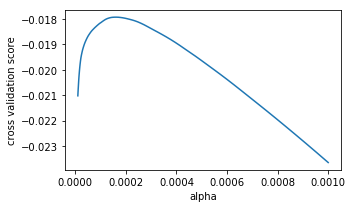

In [156]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-5, -3, 100)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.ElasticNet(alpha,normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

/Users/tianyigu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


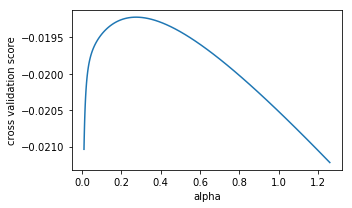

In [139]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-2, 0.1, 100)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha,normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [140]:
np.argmax(scores)

68

In [141]:
alphas[68]

0.27696458648046407

In [149]:
ridge_1st = linear_model.Ridge(0.8, normalize=True)

In [150]:
ridge_1st.fit(x_train, y_train)

Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [151]:
ridge_1st.score(x_train, y_train)

0.90496129476000442

In [152]:
model_to_csv(ridge_1st, x_test, test_ID, 'compare1.csv')

In [ ]:
#When use cv=10, multi_2 ,alpha is changed from 0.35 to 0.43, but the score droped to 0.135
#When use cv=5, multi_2 , the score is 0.134
#When use cv=5, multi_1, the score is 0.133

##  Ridge Regression model _3

In [237]:
model_to_csv(Lasso_2nd, test_df_3, test_ID, 'Lasso_Model3.csv')

## Lasso Regression

In [ ]:
###############################
        ## Lasso_1 ##
###############################

/Users/tianyigu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


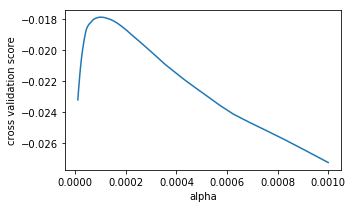

In [65]:
alphas = np.logspace(-5, -3, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Lasso(alpha, normalize=True), x_train, y_train, cv=5,
                          scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [76]:
np.argmax(scores)

24

In [77]:
alphas[24]

9.5409547634999435e-05

In [78]:
lasso_1st = linear_model.Lasso(alphas[24], normalize=True)

In [79]:
lasso_1st.fit(x_train, y_train)

Lasso(alpha=9.5409547634999435e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
lasso_1st.score(x_train, y_train)

0.91875434203900264

In [82]:
model_to_csv(lasso_1st, x_test, test_ID, 'lasso_1st.csv')

In [72]:
coef_df_lasso = pd.concat([pd.Series(lasso_1st.coef_, name='coef'), pd.Series(x_train.columns,
                                                                                     name='Features')], axis=1)

## TREE Model

In [205]:
from sklearn import ensemble
RF = ensemble.RandomForestRegressor()
#dir(ensemble)

In [206]:
RF.set_params(oob_score=True, random_state=42)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [ ]:
y_train_t = y_train_raw.copy()
x_train_t = x_train_raw.copy()
x_test_t = x_test_raw.copy()

In [208]:
##SalePrice is logged.
y_train_t = [log(x) for x in y_train_t]

In [209]:
#call the impute function in process module
all_data_imputed = impute_multi_2(all_data)

In [207]:
tree_m1 = RF.fit(x_train_t, y_train_t)

ValueError: could not convert string to float: 'Normal'

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_para_forest = [{
    "n_estimators": [25, 100, 5],
    "min_samples_leaf": range(1, 3),
    "min_samples_split": np.linspace(start=2, stop=30, num=3, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1, verbose=1)
%time grid_search_forest.fit(x_train, y_train)

### Elastic

In [299]:
#temp=pd.concat([pd.DataFrame(ridge_1st.coef_),pd.DataFrame(x_test.columns)], axis=1)
#temp.loc[abs(temp.iloc[:,0])>0.03,:]